In [7]:
import requests
import re
import json
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def simpleRequest(url,retry=3,pause=0):
    status = 0
    while ((status !=200) and retry>0):
        resp=requests.request(method='get',url=url)
        retry=retry-1
        time.sleep(pause)
        status=resp.status_code
    return resp
def getVacationList(name):
    def addIdtoVacationLst(responseJson,idLst):
        for item in requestJson['items']:
            idLst.append(item['id'])
        return idLst
    url=f"https://api.hh.ru/vacancies?text={name}&page={0}"
    vacationsIds=[]
    r=simpleRequest(url)
    requestJson=json.loads(r.text)
    lastPage=requestJson['pages'] 
    addIdtoVacationLst(requestJson,vacationsIds)
    print(lastPage)
    for i in tqdm(range(1,lastPage-1)):
        r=simpleRequest(url)
        requestJson=json.loads(r.text)
        addIdtoVacationLst(requestJson,vacationsIds)
    return vacationsIds

def getVacation(id):
    url=f"https://api.hh.ru/vacancies/{id}"
    resp=requests.request(method='get',url=url)
    respJson=json.loads(resp.text)
    return respJson

def getKeySkills(vacation):
    return  vacationJson['key_skills']
    



In [3]:
r=getVacationList("DataEngineer")

82


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:34<00:00,  2.30it/s]


In [4]:
keySkills=[]
for i in tqdm(r):
    ks=getVacation(i)['key_skills']
    for k in ks:
        keySkills.append(k['name'])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1620/1620 [03:45<00:00,  7.18it/s]


In [9]:
my_dict = {i:keySkills.count(i) for i in keySkills}
skills=dict(sorted(my_dict.items(),key=lambda item:item[1], reverse=True))

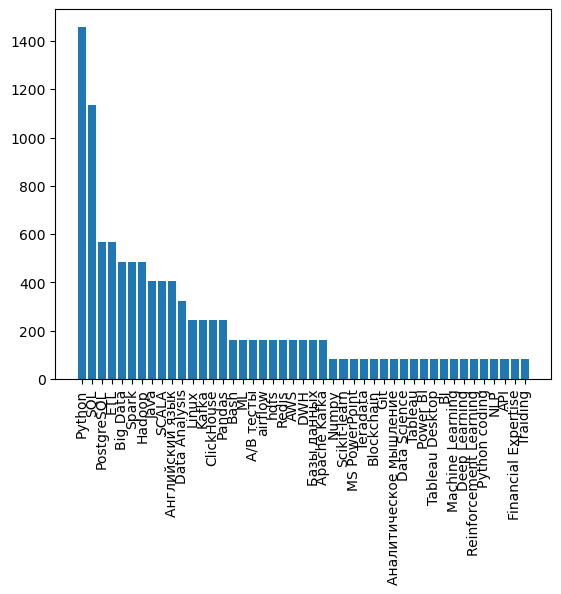

In [10]:
plt.bar(*zip(*skills.items()))
plt.xticks(range(len(skills)), list(skills.keys()), rotation='vertical')
plt.show()